In [77]:
import sys # 시스템
import os  # 시스템

import pandas as pd  # 판다스 : 데이터분석 라이브러리
import numpy as np   # 넘파이 : 숫자, 행렬 데이터 라이브러리

from bs4 import BeautifulSoup    # html 데이터를 전처리
from selenium import webdriver   # 웹 브라우저 자동화
import time    # 서버와 통신할 때 중간중간 시간 지연. 보통은 1초
from tqdm import tqdm_notebook   # for문 돌릴 때 진행상황을 %게이지로 알려준다.

In [78]:
path = "chromedriver.exe"
driver = webdriver.Chrome(path)
driver.get('https://www.melon.com/index.htm')
time.sleep(2)  # 2초간 정지

In [79]:
driver.find_element_by_link_text("멜론차트").click()

In [80]:
driver.find_elements_by_css_selector(".button_etc.like .cnt")[99].text # 상위클래스 띄우고 하위클래스

'21,240'

In [81]:
like = []


for i in range(0,99):
    like.append(driver.find_elements_by_css_selector(".button_etc.like .cnt")[i].text)

In [82]:
driver.find_elements_by_css_selector(".wrap .wrap_song_info .ellipsis.rank01")[0].text

"롤린 (Rollin')"

In [83]:
song = []

for i in range(0,99):
    song.append(driver.find_elements_by_css_selector(".wrap .wrap_song_info .ellipsis.rank01")[i].text)

In [84]:
df = pd.DataFrame({'song' : song, 'like' : like})
df

,song,like
0,롤린 (Rollin'),"252,692"
1,Peaches (Feat. Daniel Caesar & Giveon),"118,922"
2,라일락,"175,244"
3,운전만해 (We Ride),"94,058"
4,Celebrity,"276,775"
...,...,...
94,사랑은 지날수록 더욱 선명하게 남아,"63,220"
95,Panorama,"64,129"
96,서른 밤째 (바른연애 길잡이 X 윤하 (YOUNHA)),"36,475"
97,다시 만날까 봐 (Prod.V.O.S),"20,473"


In [107]:
df_10 = df.head(20)
df_10_1 = df.tail(20)

In [108]:
df_10

,song,like
0,롤린 (Rollin'),"252,692"
1,Peaches (Feat. Daniel Caesar & Giveon),"118,922"
2,라일락,"175,244"
3,운전만해 (We Ride),"94,058"
4,Celebrity,"276,775"
5,Timeless,"73,293"
6,라라라,"63,538"
7,내사람,"53,991"
8,내 손을 잡아,"139,629"
9,Coin,"80,728"


In [109]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # 시각화 라이브러리
import seaborn as sns           # 시각화 라이브러리

from tqdm import tqdm_notebook # for문 진행상황 게이지로 알려줌

In [110]:
# 파이썬 warning 무시
import warnings
warnings.filterwarnings(action='ignore') 

In [111]:
a = df_10.like.str.replace(',', '').astype('int32')
d = df_10_1.like.str.replace(',', '').astype('int32')# 문자열로 인식된 숫자데이터 중간에 ','삭제하고 정수데이터로 변환
df_10['like2'] = a
df_10_1['like2'] = d
df_10

,song,like,like2
0,롤린 (Rollin'),"252,692",252692
1,Peaches (Feat. Daniel Caesar & Giveon),"118,922",118922
2,라일락,"175,244",175244
3,운전만해 (We Ride),"94,058",94058
4,Celebrity,"276,775",276775
5,Timeless,"73,293",73293
6,라라라,"63,538",63538
7,내사람,"53,991",53991
8,내 손을 잡아,"139,629",139629
9,Coin,"80,728",80728


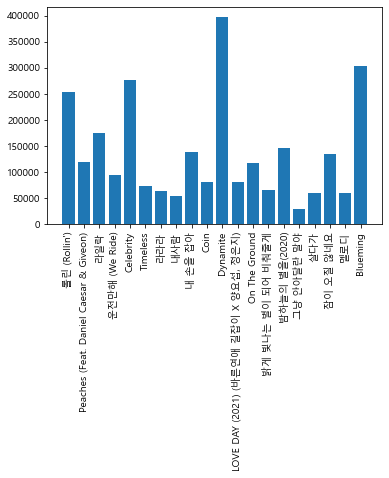

In [112]:
#한글깨짐 현상 해결 
import matplotlib 
import platform
matplotlib.rc('font',family = 'Malgun Gothic')


#그래프 그리기
plt.bar(range(len(df_10)), df_10.like2)

ax = plt.subplot()
ax.set_xticks(range(0,20))
ax.set_xticklabels(df_10.song, rotation=90)

plt.show()

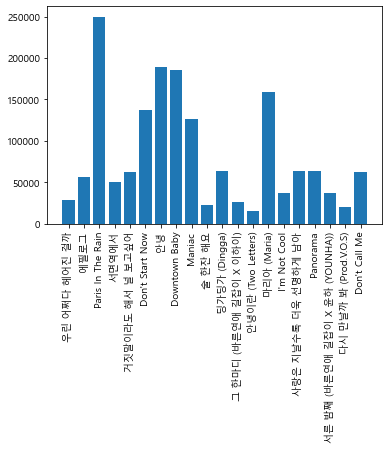

In [113]:
plt.bar(range(len(df_10_1)), df_10_1.like2)

ax = plt.subplot()
ax.set_xticks(range(0,20))
ax.set_xticklabels(df_10_1.song, rotation=90)

plt.show()